In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [3]:
# TODO : Import the Data from the kaggle API
df = pd.read_csv('/content/AB_Test_Results.csv')

# Data Understanding

In [6]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

# Information
print(" DataFrame Information:")
df.info()

# 2. Columns
print("\n Columns in DataFrame:")
print(df.columns)

# 3. Missing Values
print("\n Missing Values Count:")
print(df.isnull().sum())

# 4. Descriptive Statistics
print("\n Descriptive Statistics:")
print(df.describe())

# 5. Value Counts for VARIANT_NAME
print("\n Value Counts for VARIANT_NAME:")
print(df['VARIANT_NAME'].value_counts())

# 6. Counting Unique Users in USER_ID
print("\n Unique User Count:")
print(df['USER_ID'].nunique())

 DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

 Columns in DataFrame:
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

 Missing Values Count:
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

 Descriptive Statistics:
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

 Value Counts for VARIANT_NAME:
VARIANT_NAME
variant    5016
control    4984
Nam

# Average Revenue by VARIANT_NAME

In [10]:
#TODO
avg_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean()
print("Average Revenue by VARIANT_NAME:")
print(avg_revenue)

revenue_A = df[df['VARIANT_NAME'] == 'control']['REVENUE']
revenue_B = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

t_stat, p_value = ttest_ind(revenue_A, revenue_B, equal_var=False)

print(f"\nT-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject H0: There is a significant difference in average revenue between the variants.")
else:
    print("Fail to reject H0: No significant difference in average revenue between the variants.")


Average Revenue by VARIANT_NAME:
VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64

T-Statistic: 1.268403803110966
P-Value: 0.20469713432410777
Fail to reject H0: No significant difference in average revenue between the variants.


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [11]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
revenue_control = df[df['VARIANT_NAME'] == 'control']['REVENUE']
revenue_variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE']
stat_control, p_control = shapiro(revenue_control)
stat_variant, p_variant = shapiro(revenue_variant)
print("Shapiro-Wilk Test Results:")

print(f"\nControl Group: W-Statistic = {stat_control:.4f}, P-Value = {p_control:.4f}")
if p_control <= 0.05:
    print("Control Group data is NOT normally distributed.")
else:
    print("Control Group data IS normally distributed.")

print(f"\nVariant Group: W-Statistic = {stat_variant:.4f}, P-Value = {p_variant:.4f}")
if p_variant <= 0.05:
    print("Variant Group data is NOT normally distributed.")
else:
    print("Variant Group data IS normally distributed.")

Shapiro-Wilk Test Results:

Control Group: W-Statistic = 0.0183, P-Value = 0.0000
Control Group data is NOT normally distributed.

Variant Group: W-Statistic = 0.0270, P-Value = 0.0000
Variant Group data is NOT normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

statistic, p_value = levene(revenue_control, revenue_variant)
print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic: {statistic:.4f}, P-Value: {p_value:.4f}")

alpha = 0.05
if p_value <= alpha:
    print("Reject H0: Variances are not equal between the two groups.")
else:
    print("Fail to reject H0: Variances are equal between the two groups.")

Levene's Test for Homogeneity of Variances:
Statistic: 1.6159, P-Value: 0.2037
Fail to reject H0: Variances are equal between the two groups.


# Non-Parametric Test (mannwhitneyu Test)

In [13]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?
statistic, p_value = mannwhitneyu(revenue_control, revenue_variant, alternative='two-sided')

print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {statistic:.4f}, P-Value: {p_value:.4f}")

alpha = 0.05
if p_value <= alpha:
    print("Reject H0: There is a significant difference in revenue between the variant and control groups.")
else:
    print("Fail to reject H0: No significant difference in revenue between the variant and control groups.")

Mann-Whitney U Test Results:
U-Statistic: 12521564.0000, P-Value: 0.4783
Fail to reject H0: No significant difference in revenue between the variant and control groups.


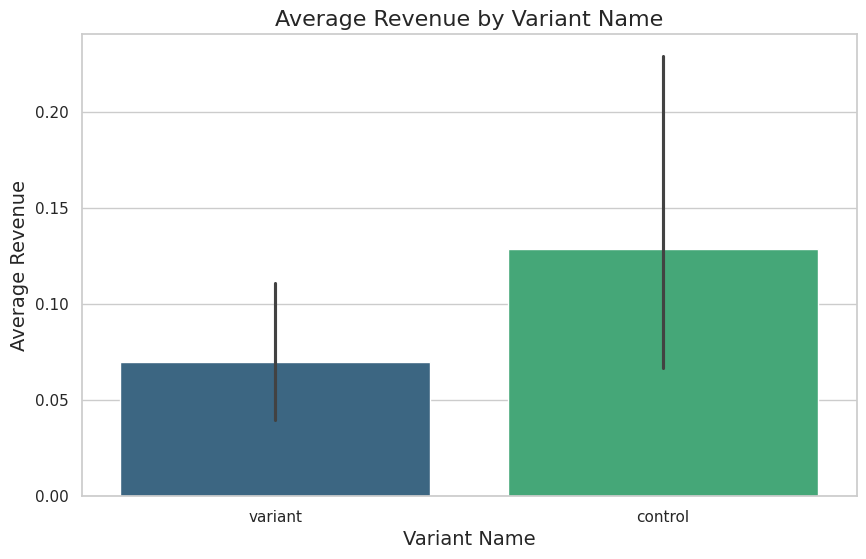

In [22]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='VARIANT_NAME',
    y='REVENUE',
    estimator='mean',
    hue = 'VARIANT_NAME',
    palette='viridis',

)
plt.title('Average Revenue by Variant Name', fontsize=16)
plt.xlabel('Variant Name', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)
plt.show()